In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import genfromtxt,log10,exp

In [28]:
X = genfromtxt("3PCFiso_FB_s.dat",delimiter = ',')
puntos = X[:,0]
tiempo = X[:,1]

In [39]:
def exp(x,a,b):
    return a*10**(b*x)

from scipy.optimize import curve_fit
from numpy import inf
pars, cov = curve_fit(f=exp, xdata=puntos, ydata=tiempo, p0=[0, 0], bounds=(-inf, inf))

x_fit = puntos
y_fit = exp(puntos,*pars)
a,b = pars[0], pars[1]

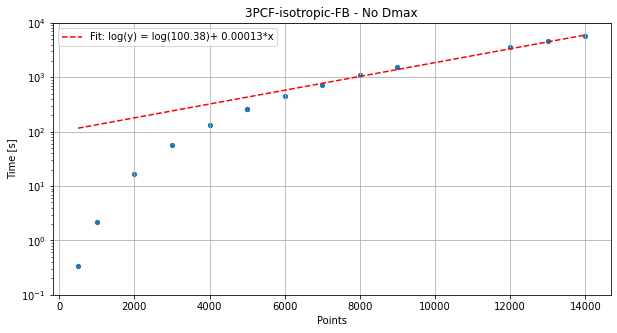

In [57]:
plt.figure(figsize=(10,5))
#plt.plot(puntos,tiempo,color = "black",
#linestyle="-",marker = 'o', markerfacecolor = "blue",markersize = 8)
plt.grid()
plt.scatter(puntos, tiempo, marker = "o", s=18)
plt.plot(x_fit,y_fit, linestyle="--", color="red", label=f"Fit: log(y) = log({round(a,2)})+ {round(b,5)}*x")
#plt.grid()
plt.yscale("log")
plt.xscale("linear")
plt.xlabel("Points")
plt.ylim([10**(-1),10**(4)])
plt.ylabel("Time [s]")
plt.legend(loc="best")
plt.title("3PCF-isotropic-FB - No Dmax")
plt.savefig("3PCFiso_FB_noDmax.png")
plt.show()